<a href="https://colab.research.google.com/github/nishantdhiman30/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description : Sentiment Analysis of Twitter Data

In [ ]:
# Importing the libraries..
import tweepy   # [To get Twitter API]
from textblob import TextBlob
import pandas as pd   # [To analyze data]
import re   # [Regular Expression]
import matplotlib.pyplot as plt   # [To plot graphs]
plt.style.use('fivethirtyeight')

In [ ]:
# load the data
from google.colab import files
uploaded = files.upload()

Saving access.csv to access.csv


In [ ]:
# Get the data
log = pd.read_csv('access.csv')

In [ ]:
# Twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Setting access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Creating the API object while passing in the auth info
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
# Extracting 50 tweets from the twitter user
posts = api.user_timeline(screen_name = "Prateek17202344", count = 50, language = "en", tweet_mode = "extended") 
j = 1
for tweet in posts[0:50]:
  print(str(j) + ') ' + tweet.full_text + "\n")
  j = j + 1

1) #HappyIndependenceDay2021 
@GEU_Official 
#indiaIndependenceday 
#IndianFlag 
#IndiaAt75 https://t.co/an7novU6nG

2) @vikrantdubeyvns No 1 State in India , #UPPInNews

3) @VSubrahmaniam A very good article which sums up all the happening in UP. And why BJP's top brass bragging about CM Yogi and the states shining card.

4) @AmethiliveCom @DmAmethi @AmethiCmo वाह रे वाह सिस्टम , सरकारी कर्मचारियों का भी अगर उपचार ना हो पाए तो अस्पताल किस काम का । सीएमओ को इस मामले में तत्कालीन संज्ञान लेना चाहिए । @myogioffice @UPGovt

5) Today @ICMRDELHI inadvertently knew about the cocktail of #Covaxin  &amp; #COVISHIELD which acc. to them offers better protection from Covid
18 people from #UP mistakenly got the mixture of the dosses , now they say they will help to overcome the challenges of shortfall of vaccines.

6) #NeerajChopra wins first #Tokyo2020 Olympic Gold.
Big Win for India.
#NeerajChopra 
#Olympics 
#Olympicsindia
🇮🇳🇮🇳🇮🇳🇮🇳 https://t.co/EFnrM2XEPL

7) तस्वीरें लखनऊ रेलवे स्टेशन की हैं ।

In [ ]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])
df

,Tweets
0,#HappyIndependenceDay2021 \n@GEU_Official \n#i...
1,"@vikrantdubeyvns No 1 State in India , #UPPInNews"
2,@VSubrahmaniam A very good article which sums ...
3,@AmethiliveCom @DmAmethi @AmethiCmo वाह रे वाह...
4,Today @ICMRDELHI inadvertently knew about the ...
5,#NeerajChopra wins first #Tokyo2020 Olympic Go...
6,तस्वीरें लखनऊ रेलवे स्टेशन की हैं । जांच कोरोन...
7,#HappyFriendshipDay \n#Basdostibanirahe \nSamj...
8,@AbhayVishen ये असहाय लोग सिर्फ मनन की बात सुन...
9,तस्वीरें सब बयां करती हैं ।\n#MamataBanerjee \...


In [ ]:
# Clean the text

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9:]+', '', text) # Removed @mentions
  text = re.sub(r'#', '', text) # Removing # symbols
  text = re.sub(r'RT[\s]+', '', text) # Removing RT (retweets)
  text = re.sub(r'https?:\/\/\S+', '', text) # Remove the hyperlinks
  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt) # Applying our function on data frame

# Printing cleaned test
df

,Tweets
0,HappyIndependenceDay2021 \n_Official \nindiaIn...
1,"No 1 State in India , UPPInNews"
2,A very good article which sums up all the hap...
3,"वाह रे वाह सिस्टम , सरकारी कर्मचारियों का भ..."
4,Today inadvertently knew about the cocktail o...
5,NeerajChopra wins first Tokyo2020 Olympic Gold...
6,तस्वीरें लखनऊ रेलवे स्टेशन की हैं । जांच कोरोन...
7,HappyFriendshipDay \nBasdostibanirahe \nSamjh ...
8,"ये असहाय लोग सिर्फ मनन की बात सुन पाते हैं , ..."
9,तस्वीरें सब बयां करती हैं ।\nMamataBanerjee \n...


In [ ]:
# Creating colums for subjectivity(how subjective the text is) and polarity(how positive or negative the text is)
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df


,Tweets,Subjectivity,Polarity
0,HappyIndependenceDay2021 \n_Official \nindiaIn...,0.000000,0.000000
1,"No 1 State in India , UPPInNews",0.000000,0.000000
2,A very good article which sums up all the hap...,0.640000,0.705000
3,"वाह रे वाह सिस्टम , सरकारी कर्मचारियों का भ...",0.000000,0.000000
4,Today inadvertently knew about the cocktail o...,0.250000,0.300000
5,NeerajChopra wins first Tokyo2020 Olympic Gold...,0.258333,0.337500
6,तस्वीरें लखनऊ रेलवे स्टेशन की हैं । जांच कोरोन...,0.000000,0.000000
7,HappyFriendshipDay \nBasdostibanirahe \nSamjh ...,0.000000,0.000000
8,"ये असहाय लोग सिर्फ मनन की बात सुन पाते हैं , ...",0.000000,0.000000
9,तस्वीरें सब बयां करती हैं ।\nMamataBanerjee \n...,0.000000,0.000000


In [ ]:
# Analysis of positive, negative or neutral tweet
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,HappyIndependenceDay2021 \n_Official \nindiaIn...,0.000000,0.000000,Neutral
1,"No 1 State in India , UPPInNews",0.000000,0.000000,Neutral
2,A very good article which sums up all the hap...,0.640000,0.705000,Positive
3,"वाह रे वाह सिस्टम , सरकारी कर्मचारियों का भ...",0.000000,0.000000,Neutral
4,Today inadvertently knew about the cocktail o...,0.250000,0.300000,Positive
5,NeerajChopra wins first Tokyo2020 Olympic Gold...,0.258333,0.337500,Positive
6,तस्वीरें लखनऊ रेलवे स्टेशन की हैं । जांच कोरोन...,0.000000,0.000000,Neutral
7,HappyFriendshipDay \nBasdostibanirahe \nSamjh ...,0.000000,0.000000,Neutral
8,"ये असहाय लोग सिर्फ मनन की बात सुन पाते हैं , ...",0.000000,0.000000,Neutral
9,तस्वीरें सब बयां करती हैं ।\nMamataBanerjee \n...,0.000000,0.000000,Neutral


In [ ]:
# Printing all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1)  A very good article which sums up all the happening in UP. And why BJP's top brass bragging about CM Yogi and the states shining card.

2) Today  inadvertently knew about the cocktail of Covaxin  &amp; COVISHIELD which acc. to them offers better protection from Covid
18 people from UP mistakenly got the mixture of the dosses , now they say they will help to overcome the challenges of shortfall of vaccines.

3) NeerajChopra wins first Tokyo2020 Olympic Gold.
Big Win for India.
NeerajChopra 
Olympics 
Olympicsindia
🇮🇳🇮🇳🇮🇳🇮🇳 

4)    Busy acting patriotic 🤣🤣

5) A society where students celebrate the cancellation of exam and cry over ban of PUBG &amp; TickTock has definitely no right to ask questions about unemployment .
Good day ahead 😊.
exams2021
Exams 
 


6) Mr. Prime Minister
Mr. Busy Prime Minister
Mr. Mann ki Baat Prime Minister
Can you do it , never ......
 🔥🔥🔥
Bengal 
MamataBanerjee

7) Some Politicians want India to look Good . Some Politicians want themselves to look good . 

In [ ]:
# Printing all of the negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1) Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. 

2) Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. 

3) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:  

4) Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

5) For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 

6) Black folks have questions about the COVID-19 va

In [ ]:
# Printing all of the neutral tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Neutral'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1) This partnership between  Energy and the _Commission will create jobs around the world, build sustainable global industries, and expand opportunity for billions:  Thank you to  as well for your support. 

2) Avoiding a climate disaster is possible if governments act today. ’s Net Zero by 2050 report provides a roadmap to achieve this critical goal. 

3) Stronger collaboration can help countries recover from the impact of COVID19 and progress towards health-related …

4) 

5) I was honored to speak at today’s LeadersClimateSummit about the three things we need to do to avoid a climate disaster. 

6) Cement is responsible for 6% of carbon emissions globally. To get to net-zero by 2050, we need innovations to decarbonize the material. I discuss a few approaches to make low-emission cement in my climate book: 

7) Here are five things you should know if you want to understand how variants are (and aren’t) complicating the pandemic. 

8) 💡 From climateadaptation to genderequality, discov

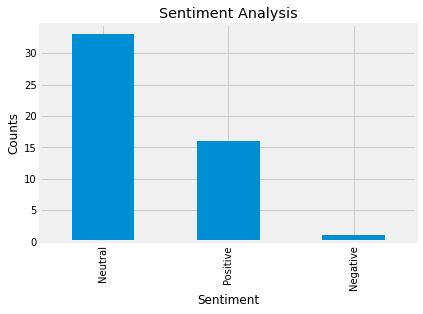

In [ ]:
# Plotting our observations on a graph
# df['Analysis'].value_counts() 
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar') # It returns a series of count unique values 
plt.show()